# Compton scattering: plotting the differential cross sections

$
\dfrac{\mathrm{d}\sigma\left(s, t\right)}{\mathrm{d}t} = \dfrac{2\pi\alpha^2}{\left(s - m^2\right)^2}
\left[
\dfrac{s + t - m^2}{s - m^2} + \dfrac{s - m^2}{s + t - m^2} +2 m^{2}\left(
\dfrac{2}{s - m^2} - \dfrac{2}{s + t - m^2}
\right) + m^{4}\left(
\dfrac{2}{s - m^2} - \dfrac{2}{s + t - m^2}
\right)^{2}
\right]
$

$
\dfrac{\mathrm{d}\sigma}{\mathrm{d}\cos\theta} = \dfrac{\pi \alpha^{2}}{m^{2}} \left(\frac{\omega^{\prime}}{\omega}\right)^{2}
\left[\dfrac{\omega^{\prime}}{\omega}+\dfrac{\omega}{\omega^{\prime}}-\sin ^{2} \theta\right]
$

In [1]:
import os

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('dark_background')
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [2]:
# make a directory to store the plots
dir_path = 'plots'
if (not os.path.isdir(dir_path)): 
    os.mkdir(dir_path)

## Defining some physics constants

In [3]:
FINE_STR = 137.035999206 ** -1 # ref: https://www.nature.com/articles/s41586-020-2964-7
E_MASS = 0.51099895000 # Wikipedia
E_MASS_SQ = E_MASS ** 2

## Setting data generation parameters

In [4]:
num_pts = 1000

## Writing the derivatives as functions

In [5]:
def dxsec_dt(t, s):
    """Returns the differential cross section of Compton scattering
    as a function of t (the squared 4-momentum transfer),
    parameterised by s (the total state energy squared).
    """
    coll_E = s - E_MASS_SQ # squared collision energy
    overlap_E = coll_E + t # overlap of particle energies, u
    
    prefactor = 2 * np.pi * (FINE_STR / coll_E) ** 2
    brac = (overlap_E / coll_E
            + coll_E / overlap_E
            + 2 * E_MASS_SQ * (2.0 / coll_E - 2.0 / overlap_E)
            + (E_MASS_SQ ** 2) * (2.0 / coll_E - 2.0 / overlap_E) ** 2
           )
    return prefactor * brac

def gen_t(s, num_pts):
    """Returns a linearly spaced sample of points within the
    range of allowed values for t, determined by s.
    """
    t_min = - (s - E_MASS_SQ) ** 2 / s
    t_max = 0.0
    return np.linspace(t_min, t_max, num_pts)

In [6]:
def dxsec_dcos(cosx, s):
    freq_mass = 0.5 * (-1.0 + s / E_MASS_SQ) # omega / mass
    freq_ratio = (1.0 + freq_mass * (1.0 - cosx)) ** -1 # omega' / omega
    
    prefactor = np.pi * FINE_STR ** 2 / E_MASS_SQ
    brac = (freq_ratio ** 3
            + freq_ratio
            + (cosx ** 2 - 1.0) * freq_ratio ** 2
           )
    return prefactor * brac

## Setting plot parameters

In [7]:
plot_info = {
    'low': {
        's': 1.0001 * E_MASS_SQ, # 1% e mass
        'legend': r"$s - m^2 << m^2$",
        'line': 'dotted',
        'color': 'lightsalmon',
    },
    'medium': {
        's': 2.0 * E_MASS_SQ, # same as e mass
        'legend': r"$s - m^2 = m^2$",
        'line': 'dashed',
        'color': 'lightskyblue',
    },
    'high': {
        's': 401.0 * E_MASS_SQ, # 20x e mass
        'legend': r"$s - m^2 >> m^2$",
        'line': 'solid',
        'color': 'thistle',
    },
}

## Plotting and saving to eps

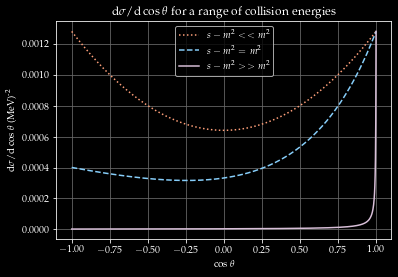

In [16]:
plt.rcParams.update({
    "grid.color": "dimgray"
})
plt.title(r'$\mathrm{d}\sigma/\mathrm{d}\cos\theta$ for a range of collision energies')
plt.xlabel(r'$\cos\theta$')
plt.ylabel(r'$\mathrm{d}\sigma/\mathrm{d}\cos\theta$ (MeV)\textsuperscript{-2}')

cosx = np.linspace(-1.0, 1.0, num_pts)

y = {}
for key, val in plot_info.items():
    y[key] = dxsec_dcos(cosx, val['s'])
    plt.plot(cosx, y[key],
            label=plot_info[key]['legend'],
            color=plot_info[key]['color'],
            linestyle=plot_info[key]['line'])

plt.grid()
plt.legend()
plt.savefig(dir_path + '/dcos.svg', bbox_inches='tight', format='svg', transparent=True)

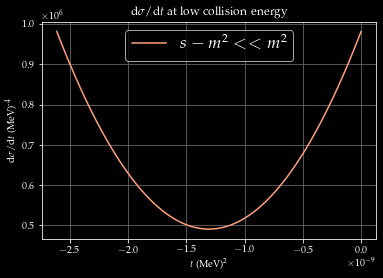

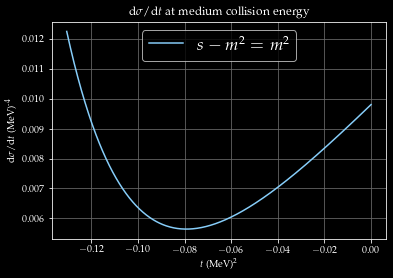

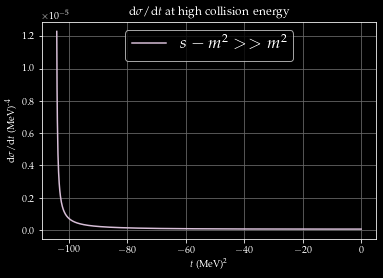

In [20]:
textbig = {'figure.figsize': (6, 4)}
plt.rcParams.update(textbig)


t, y = {}, {}
for key, val in plot_info.items():
    t[key] = gen_t(val['s'], num_pts)
    y[key] = dxsec_dt(t[key], val['s'])
    
    fig, ax = plt.subplots()
    ax.set(title=r'$\mathrm{d}\sigma/\mathrm{d}t$ at ' + key + r' collision energy',
           xlabel=r'$t$ (MeV)\textsuperscript{2}',
           ylabel=r'$\mathrm{d}\sigma/\mathrm{d}t$ (MeV)\textsuperscript{-4}'
    )
    ax.grid()
    ax.plot(t[key], y[key],
            label=plot_info[key]['legend'],
            color=plot_info[key]['color'])
    ax.legend(loc='upper center')
    plt.savefig(dir_path + '/dt_' + key + '.svg', bbox_inches='tight', format='svg', transparent=True)

